In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 

import numpy as np
# IP import warnings because of "module 'numpy' has no attribute 'warnings'"
import warnings
np.warnings = warnings
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from scipy.optimize import curve_fit, OptimizeWarning
from sklearn.metrics import r2_score

# import from scripts
import os
os.chdir(os.path.expanduser("D:\\intr_timescales\\isttc\\scripts"))
# os.chdir(os.path.expanduser("C:\\Users\\ipoch\\Documents\\repos\\isttc\\scripts"))
from calculate_acf import acf_sttc

### Load the data

In [2]:
save_folder = 'Q:\\Personal\\Irina\\projects\\isttc\\results\\synthetic_data\\test_full_split_parametric\\dataset\\'

n_signals = 100

In [4]:
spike_times_l = []
spike_times_binned_l = []

for signal_ in range(n_signals):
    spike_times_l.append(np.load(save_folder + 'spike_times_' + str(signal_) + '.npy'))
    spike_times_binned_l.append(np.load(save_folder + 'spike_times_binned_' + str(signal_) + '.npy'))

In [5]:
num_lags = 20
bin_size = 50
sttc_dt = 49
signal_len = 100000

In [34]:
def func_exp_abc_like(x, a, tau):
    return a * np.exp(-x/tau) 

# def func_exp(x, a, tau, b):
#     return a * np.exp(-x/tau) + b

In [10]:
spike_times_binned_l[0]

array([[2., 0., 0., ..., 0., 0., 2.]])

### Calculate acf and sttc for the full signal

In [12]:
acf_acf_l = []
acf_tau_ms_l = []

for signal_ in range(n_signals):
    spike_train_binned_acf = acf(spike_times_binned_l[signal_][0], nlags=num_lags)
    #print('spike_train_binned_acf shape {}, \nspike_train_binned_acf: {}'.format(spike_train_binned_acf.shape, spike_train_binned_acf))
    
    spike_train_binned_popt, _ = curve_fit(func_exp_abc_like, np.linspace(0,20,21), spike_train_binned_acf, maxfev=5000)
    spike_train_binned_tau_ms = spike_train_binned_popt[1] * bin_size
    #print('spike_train_binned_popt: {}, spike_train_binned_tau_ms: {}'.format(spike_train_binned_popt, spike_train_binned_tau_ms))

    acf_acf_l.append(spike_train_binned_acf)
    acf_tau_ms_l.append(spike_train_binned_tau_ms)

print(acf_tau_ms_l)

[71.04342336053944, 98.3392054874235, 79.10007333989634, 84.19136523035094, 83.71068747263062, 81.24011632213748, 83.88471174816871, 80.43459318032065, 88.58390722464947, 94.07662575344949, 78.26035930370521, 77.53613575701208, 94.1899236506559, 85.98958791121983, 76.5157734005557, 105.23095995780764, 74.0858663136328, 83.41217585698911, 86.03694721798817, 89.96760955605659, 78.73781002442426, 85.03636924660258, 92.09844421218656, 86.1409901007273, 93.11535299346704, 71.62240180371258, 76.08943143996582, 93.0241348847397, 84.16891145890052, 75.36317155799978, 80.95571599913727, 82.54198453362108, 92.55311263546072, 83.4519245011456, 90.37587861290659, 92.04156908063379, 76.98914061755934, 84.92147383329464, 86.25257481769391, 73.04300770359703, 73.19179800124749, 83.72632810303502, 84.08501132664337, 82.57548723855615, 71.14932983825081, 81.81268397165451, 79.17367039283386, 88.43149859641501, 88.0971117101744, 85.81055914878844, 101.84353948507379, 94.86691356727076, 87.75328579605932

In [13]:
isttc_acf_l = []
isttc_tau_ms_l = []

for signal_ in range(n_signals):
    spike_train_acf = acf_sttc(spike_times_l[signal_], num_lags, lag_shift_=bin_size, sttc_dt_=sttc_dt, signal_length_=signal_len, verbose_=False)
    # print('spike_train_acf shape {}, \nspike_train_acf: {}'.format(len(spike_train_acf), spike_train_acf))
    
    spike_train_popt, _ = curve_fit(func_exp_abc_like, np.linspace(0,20,20), spike_train_acf, maxfev=5000)
    spike_train_tau_ms = spike_train_popt[1] * bin_size
    print('spike_train_popt: {}, spike_train_tau_ms: {}'.format(spike_train_popt, spike_train_tau_ms))

    isttc_acf_l.append(spike_train_acf)
    isttc_tau_ms_l.append(spike_train_tau_ms)

print(isttc_tau_ms_l)

STTC : 1.0
STTC : 0.7272768185185248
STTC : 0.3319080503990768
STTC : 0.18062774002978454
STTC : 0.1188767920689697
STTC : 0.08496132102294776
STTC : 0.058741060493203566
STTC : 0.05702340877515584
STTC : 0.042212602398081174
STTC : 0.03981802493409106
STTC : 0.02554748892907394
STTC : -0.018500041105429056
STTC : -0.01641876016672154
STTC : -0.018868994623399974
STTC : -0.017122370869788177
STTC : -0.012798403676392341
STTC : 0.0018702844757880251
STTC : -0.005128855412330267
STTC : 0.01387499426404722
STTC : 0.01894771766312692
spike_train_popt: [1.03387568 2.09153018], spike_train_tau_ms: 104.5765089066049
STTC : 1.0
STTC : 0.7805456714978127
STTC : 0.4531009203046476
STTC : 0.28033873573342977
STTC : 0.17964499682754104
STTC : 0.11467551851529037
STTC : 0.04490073256153463
STTC : 0.009600462422298929
STTC : 0.014014482070351861
STTC : 0.009468709669272685
STTC : -0.011222413447197432
STTC : -0.016915492952693872
STTC : -0.02462229383771186
STTC : -0.01900346599037157
STTC : -0.0277

In [36]:
tau_acf_vs_isttc_df = pd.DataFrame(np.vstack((acf_tau_ms_l, isttc_tau_ms_l)).T, columns=['acf_tau', 'sttc_tau'])
tau_acf_vs_isttc_df.dropna(inplace=True)
tau_acf_vs_isttc_df['acf_diff'] = tau_acf_vs_isttc_df['acf_tau'] - 100 
tau_acf_vs_isttc_df['isttc_diff'] = tau_acf_vs_isttc_df['sttc_tau'] - 100 
tau_acf_vs_isttc_df

,acf_tau,sttc_tau,acf_diff,isttc_diff
0,71.043423,104.576509,-28.956577,4.576509
1,98.339205,122.293859,-1.660795,22.293859
2,79.100073,102.313047,-20.899927,2.313047
3,84.191365,108.998409,-15.808635,8.998409
4,83.710687,100.838688,-16.289313,0.838688
...,...,...,...,...
95,79.550169,108.858026,-20.449831,8.858026
96,86.212549,111.685907,-13.787451,11.685907
97,85.678247,106.158001,-14.321753,6.158001
98,80.658866,115.840833,-19.341134,15.840833


In [37]:
tau_acf_vs_isttc_df.describe()

,acf_tau,sttc_tau,acf_diff,isttc_diff
count,100.000000,100.000000,100.000000,100.000000
mean,85.508046,111.917718,-14.491954,11.917718
std,9.013049,8.178651,9.013049,8.178651
min,71.043423,96.837453,-28.956577,-3.162547
25%,79.360074,105.452123,-20.639926,5.452123
50%,84.978922,111.994872,-15.021078,11.994872
75%,90.038703,116.589495,-9.961297,16.589495
max,131.620412,137.810489,31.620412,37.810489


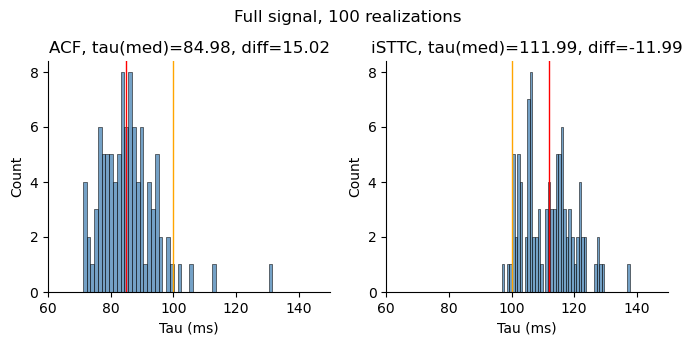

In [35]:
fig, axes = plt.subplots(1,2, figsize=(8,3))

sns.histplot(ax=axes[0], x=tau_acf_vs_isttc_df['acf_tau'].values, bins=50, stat='count', color='steelblue')
axes[0].axvline(x=np.median(tau_acf_vs_isttc_df['acf_tau'].values), lw=1, color='red')
axes[0].set_title('ACF, tau(med)={}, diff={}'.format(np.round(np.median(tau_acf_vs_isttc_df['acf_tau'].values), 2), 
                                                     np.round(100-np.median(tau_acf_vs_isttc_df['acf_tau'].values), 2)))

sns.histplot(ax=axes[1], x=tau_acf_vs_isttc_df['sttc_tau'].values, bins=50, stat='count', color='steelblue')
axes[1].axvline(x=np.median(tau_acf_vs_isttc_df['sttc_tau'].values), lw=1, color='red')
axes[1].set_title('iSTTC, tau(med)={}, diff={}'.format(np.round(np.median(tau_acf_vs_isttc_df['sttc_tau'].values), 2), 
                                                     np.round(100-np.median(tau_acf_vs_isttc_df['sttc_tau'].values), 2)))

fig.suptitle('Full signal, 100 realizations', y=1.05)

for ax in axes.flat:
    ax.axvline(x=100, lw=1, color='orange')
    ax.set_xlabel('Tau (ms)')
    ax.set_xlim([60, 150])

sns.despine()

fig.savefig('Q:\\Personal\\Irina\\projects\\isttc\\results\\synthetic_data\\test_full_split_parametric\\' + 'full_signal_100.png' , bbox_inches='tight')

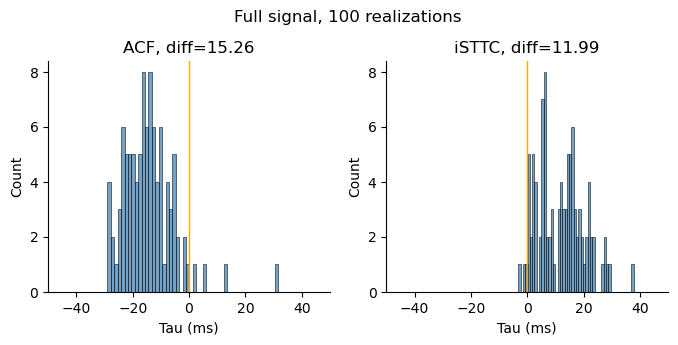

In [46]:
fig, axes = plt.subplots(1,2, figsize=(8,3))

sns.histplot(ax=axes[0], x=tau_acf_vs_isttc_df['acf_diff'].values, bins=50, stat='count', color='steelblue')
# axes[0].axvline(x=np.median(tau_acf_vs_isttc_df['acf_tau'].values), lw=1, color='red')
axes[0].set_title('ACF, diff={}'.format(np.round(np.median(abs(tau_acf_vs_isttc_df['acf_diff'].values)), 2)))

sns.histplot(ax=axes[1], x=tau_acf_vs_isttc_df['isttc_diff'].values, bins=50, stat='count', color='steelblue')
# axes[1].axvline(x=np.median(tau_acf_vs_isttc_df['sttc_tau'].values), lw=1, color='red')
axes[1].set_title('iSTTC, diff={}'.format(np.round(np.median(abs(tau_acf_vs_isttc_df['isttc_diff'].values)), 2)))

fig.suptitle('Full signal, 100 realizations', y=1.05)

for ax in axes.flat:
    ax.axvline(x=0, lw=1, color='orange')
    ax.set_xlabel('Tau (ms)')
    ax.set_xlim([-50, 50])

sns.despine()

fig.savefig('Q:\\Personal\\Irina\\projects\\isttc\\results\\synthetic_data\\test_full_split_parametric\\' + 'full_signal_100_diff.png' , bbox_inches='tight')

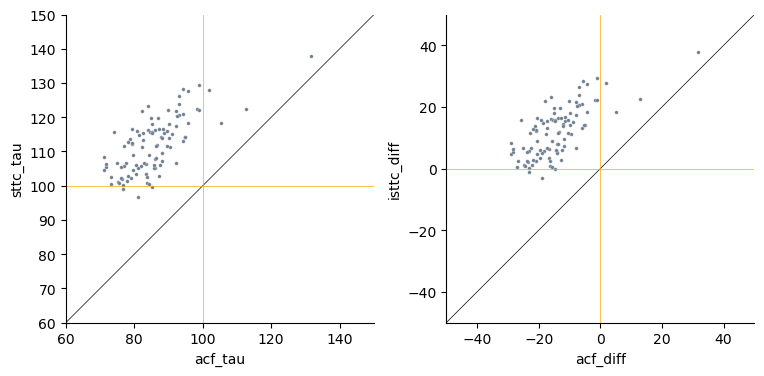

In [65]:
fig, axes = plt.subplots(1,2, figsize=(9, 4))

sns.scatterplot(ax=axes[0], x=tau_acf_vs_isttc_df['acf_tau'], y=tau_acf_vs_isttc_df['sttc_tau'], s=7, color='slategray')
axes[0].plot([0, 1], [0, 1], c='k', lw=0.5, transform=axes[0].transAxes)
axes[0].set_xlim([60, 150])
axes[0].set_ylim([60, 150])
axes[0].axvline(x=100, lw=0.5, c='orange')
axes[0].axhline(y=100, lw=0.5, c='orange')

sns.scatterplot(ax=axes[1], x=tau_acf_vs_isttc_df['acf_diff'], y=tau_acf_vs_isttc_df['isttc_diff'], s=7, color='slategray')
axes[1].plot([0, 1], [0, 1], c='k', lw=0.5, transform=axes[1].transAxes)
axes[1].set_xlim([-50, 50])
axes[1].set_ylim([-50, 50])
axes[1].axvline(x=0, lw=0.5, c='orange')
axes[1].axhline(y=0, lw=0.5, c='orange')

for ax in axes.flat:
    ax.set_aspect('equal', adjustable='box')

sns.despine()

fig.savefig('Q:\\Personal\\Irina\\projects\\isttc\\results\\synthetic_data\\test_full_split_parametric\\' + 'full_signal_100_pairwise.png' , bbox_inches='tight')